In [ ]:
import numpy as np

In [ ]:
Tp = {
    'Sunny': {'Sunny': 0.7, 'Rainy': 0.3},  # Probabilities from Sunny
    'Rainy': {'Sunny': 0.5, 'Rainy': 0.5}   # Probabilities from Rainy
}

Ep = {
    'Sunny': {'Walk': 0.6, 'Shop': 0.1, 'Clean': 0.3},  # Probabilities of observations from Sunny
    'Rainy': {'Walk': 0.1, 'Shop': 0.7, 'Clean': 0.2}   # Probabilities of observations from Rainy
}

observations = ['Clean', 'Shop','Walk']

Initial_prob = [1, 0]

In [ ]:
#FORWARD PROCEDURE

alpha = np.zeros((len(Tp), len(observations)+1))
alpha[:,0] = Initial_prob

for i in range(1, len(observations)+1):
  alpha[0][i] = alpha[0][i-1]*Tp['Sunny']['Sunny']*Ep['Sunny'][observations[i-1]] + alpha[1][i-1]*Tp['Rainy']['Sunny']*Ep['Rainy'][observations[i-1]]
  alpha[1][i] = alpha[1][i-1]*Tp['Rainy']['Rainy']*Ep['Rainy'][observations[i-1]] + alpha[0][i-1]*Tp['Sunny']['Rainy']*Ep['Sunny'][observations[i-1]]

alpha

array([[1.      , 0.21    , 0.0462  , 0.021294],
       [0.      , 0.09    , 0.0378  , 0.010206]])

In [ ]:
#BACKWARD PROCEDURE

beta = np.zeros((len(Tp), len(observations)+1))
beta[:,len(observations)] = [1,1]

for i in range(len(observations)-1, -1, -1):
  beta[0][i] = beta[0][i+1]*Tp['Sunny']['Sunny']*Ep['Sunny'][observations[i]] + beta[1][i+1]*Tp['Sunny']['Rainy']*Ep['Sunny'][observations[i]]
  beta[1][i] = beta[1][i+1]*Tp['Rainy']['Rainy']*Ep['Rainy'][observations[i]] + beta[0][i+1]*Tp['Rainy']['Sunny']*Ep['Rainy'][observations[i]]

beta

GRAPH

In [ ]:
pip install networkx

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 929.6 kB/s eta 0:00:02
   ------------ --------------------------- 0.5/1.7 MB 929.6 kB/s eta 0:00:02
   ------------ --------------------------- 0.5/1.7 MB 929.6 kB/s eta 0:00:02
   ------------ --------------------------- 0.5/1.7 MB 929.6 kB/s eta 0:00:02
   ------------------ --------------------- 0.8/1.7 MB 485.9 kB/s eta 0:00:02
   ------------------ --------------------- 0.8/1.7 MB 485.9 kB/s eta 0:00:02
   ------------------------ --------------- 1.0/1.7 MB 488.5 kB/s eta 0:00:02
   ------------------------ --------------- 1.0/1.7 MB 488.5 kB/s eta 0:00:02
   ------------------------ --------------- 1.0/1.7 MB 488.5 kB/s eta 0:00:02
   ------------------------------ --------- 1.3/1.7 MB 486.1 kB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 486.1 kB/s eta 0:00:01
   -


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import networkx as nx

In [ ]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


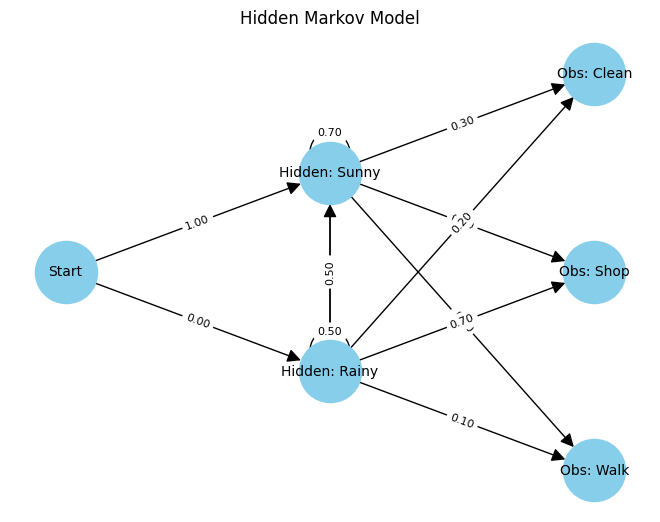

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

def draw_hmm(states, observations, start_probs, transition_probs, emission_probs):
    graph = nx.DiGraph()

    graph.add_node("start", label="Start", subset=0)

    for state in states:
        graph.add_node(state, label=f"Hidden: {state}", subset=1)

    for obs in observations:
        graph.add_node(obs, label=f"Obs: {obs}", subset=2)

    for state, prob in start_probs.items():
        graph.add_edge("start", state, label=f"{prob:.2f}")

    for from_state in states:
        for to_state in states:
            prob = transition_probs.loc[from_state, to_state]
            if prob > 0:
                graph.add_edge(from_state, to_state, label=f"{prob:.2f}")

    for state in states:
        for obs in observations:
            prob = emission_probs.loc[state, obs]
            if prob > 0:
                graph.add_edge(state, obs, label=f"{prob:.2f}")

    pos = nx.multipartite_layout(graph, subset_key="subset")

    nx.draw(graph, pos, with_labels=False, node_size=2000, node_color="skyblue", font_size=10, font_weight="bold", arrowsize=20)

    node_labels = nx.get_node_attributes(graph, 'label')
    nx.draw_networkx_labels(graph, pos, labels=node_labels, font_size=10)

    edge_labels = nx.get_edge_attributes(graph, 'label')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Hidden Markov Model")
    plt.show()

# Provided data

states = list(Tp.keys())
start_probs = dict(zip(states, [1, 0]))

transition_probs = pd.DataFrame(Tp)
transition_probs = transition_probs.T

emission_probs = pd.DataFrame(Ep)
emission_probs = emission_probs.T

draw_hmm(states, observations, start_probs, transition_probs, emission_probs)


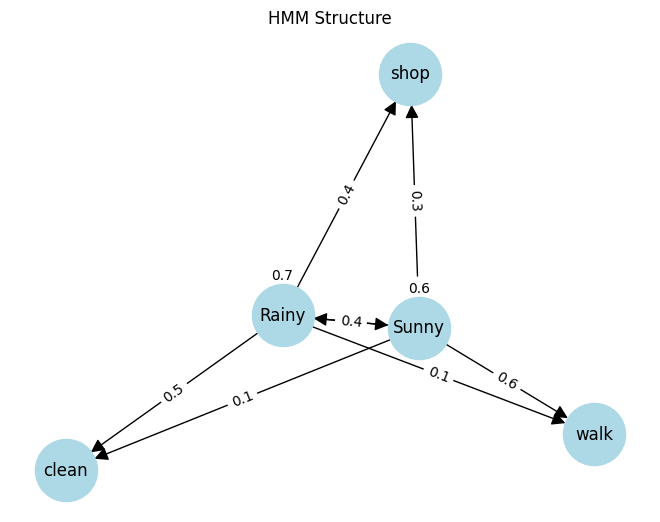

Forward: {'Rainy': [0.06, 0.0552, 0.028953599999999996], 'Sunny': [0.24, 0.048167999999999996, 0.0037586879999999996]}
Backward: {'Rainy': [0.11864, 0.38, 1], 'Sunny': [0.0434624, 0.136, 1]}
Viterbi: {'Rainy': [0.06, 0.038400000000000004, 0.01344], 'Sunny': [0.24, 0.043199999999999995, 0.0025919999999999997]}
Final Probability: 0.03271228799999999


In [1]:
# code2
import networkx as nx
import matplotlib.pyplot as plt

# Define model
states = ['Rainy', 'Sunny']
obs = ['walk', 'shop', 'clean']
init = {'Rainy': 0.6, 'Sunny': 0.4}
trans = {'Rainy': {'Rainy': 0.7, 'Sunny': 0.3}, 'Sunny': {'Rainy': 0.4, 'Sunny': 0.6}}
emit = {'Rainy': {'walk': 0.1, 'shop': 0.4, 'clean': 0.5}, 'Sunny': {'walk': 0.6, 'shop': 0.3, 'clean': 0.1}}
seq = ['walk', 'shop', 'clean']

# Build and plot graph
G = nx.DiGraph()
for s in states: G.add_edge(s, s, weight=trans[s][s])
for s1 in states:
    for s2 in states:
        if s1 != s2: G.add_edge(s1, s2, weight=trans[s1][s2])
    for o in obs: G.add_edge(s1, o, weight=emit[s1][o], style='dashed')

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
plt.title("HMM Structure")
plt.show()

# Forward
def forward(seq): 
    f = {s: [init[s] * emit[s][seq[0]]] for s in states}
    for t in seq[1:]:
        for s in states:
            f[s].append(sum(f[ps][-1] * trans[ps][s] * emit[s][t] for ps in states))
    return f

# Backward
def backward(seq):
    b = {s: [1] for s in states}
    for i in range(len(seq)-2, -1, -1):
        for s in states:
            b[s].insert(0, sum(b[ns][0] * trans[s][ns] * emit[ns][seq[i+1]] for ns in states))
    return b

# Viterbi
def viterbi(seq):
    v = {s: [init[s] * emit[s][seq[0]]] for s in states}
    for t in seq[1:]:
        for s in states:
            v[s].append(max(v[ps][-1] * trans[ps][s] * emit[s][t] for ps in states))
    return v

# Results
fwd = forward(seq)
bwd = backward(seq)
vit = viterbi(seq)
final_prob = sum(fwd[s][-1] for s in states)

print("Forward:", fwd)
print("Backward:", bwd)
print("Viterbi:", vit)
print("Final Probability:", final_prob)